In [26]:
from numpy import genfromtxt, zeros
from pylab import plot, show, figure, subplot, hist, xlim
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score

In [27]:


data = genfromtxt('data.csv',delimiter=',',usecols=(0,1,2,3))
# data = preprocessing.label_binarize(data, classes=[0, 1, 2, 3])
target = genfromtxt('data.csv',delimiter=',',usecols=(4),dtype=str)


In [28]:
# Fit a randomForest model, decision tree,Knn,logistic regression model,linear discriminant analysis,quadratic discriminant analysis, and Boosting algorithm model to the training data.

classifiers = [
  RandomForestClassifier(),
  DecisionTreeClassifier(),
  KNeighborsClassifier(),
  LogisticRegression(),
  LinearDiscriminantAnalysis(),
  QuadraticDiscriminantAnalysis(),
  GradientBoostingClassifier(),
]
sets = []


In [29]:
for classifier in classifiers:
  t = zeros(len(target))
  t[target == 'setosa'] = 1
  t[target == 'versicolor'] = 2
  t[target == 'virginica'] = 3
  (train, test, t_train, t_test) = train_test_split(data, t,test_size=0.5, random_state=0)
  sets.append((train, test, t_train, t_test))
  classifier.fit(train,t_train) # train



/home/semere/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Predict the labels for the corresponding test data
predictions = []

In [31]:
for classifier in classifiers:
  predictions.append(classifier.predict(data))


In [32]:
# Compute the confusion matrix for the test data.
matrices = []
for classifier in classifiers:
    matrices.append(confusion_matrix(classifier.predict(test),t_test))


In [33]:
# Compute the AUC (Area Under the Curve) for each classifier.
from sklearn.metrics import roc_curve


auc_scores = []

for index in range(len(classifiers)):
  classifier = classifiers[index]
  data_sets = sets[index]
  y_prob = classifier.predict_proba(data_sets[1])
  # print(roc_curve(data_sets[3], y_prob, pos_label=1))
  auc_scores.append(roc_auc_score(data_sets[3], y_prob, multi_class='ovr'))

In [34]:
# Compute the AUC (Area Under the Curve) for each classifier.


curves = []

for index in range(len(classifiers)):
  classifier = classifiers[index]
  data_sets = sets[index]
  y_prob = classifier.predict_proba(data_sets[1])[:, 1]
  curves.append(roc_curve(data_sets[3], y_prob, pos_label=1))
  # print(data_sets[3].shape)
  # print(y_prob.shape)
  # auc_scores.append(roc_auc_score(data_sets[3], y_prob, multi_class='ovr'))

In [35]:
print(auc_scores)

[0.9953267973856209, 0.969880174291939, 0.9937690631808279, 0.9896151053013797, 0.998442265795207, 0.997923021060276, 0.996884531590414]


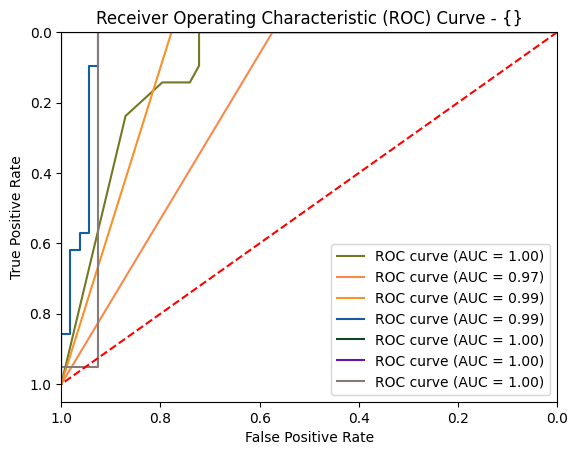

In [36]:
import random

def random_contrast_color():
    r, g, b = [random.randint(0, 255) for _ in range(3)]
    luma = 0.2126 * r + 0.7152 * g + 0.0722 * b
    if luma > 200:
        r, g, b = [random.randint(0, 200) for _ in range(3)]
    return f"#{r:02x}{g:02x}{b:02x}"


import matplotlib.pyplot as plt
for index in range(len(curves)):
  curve = curves[index]
  auc_score = auc_scores[index]
  fpr = curve[0]
  tpr = curve[1]
  thresholds = curve[2]
  plt.plot(fpr, tpr, color=random_contrast_color(), label='ROC curve (AUC = %0.2f)' % auc_score)
  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - {}')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()



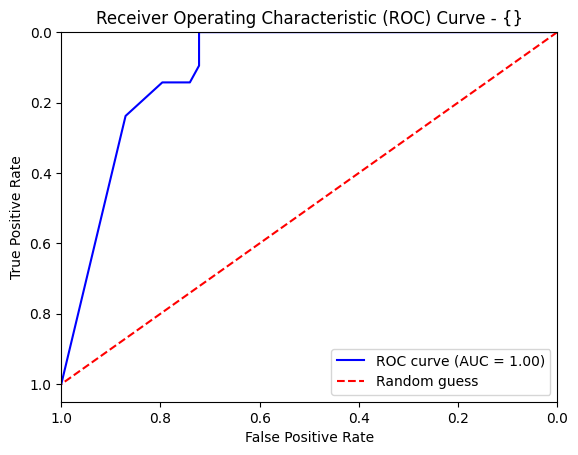

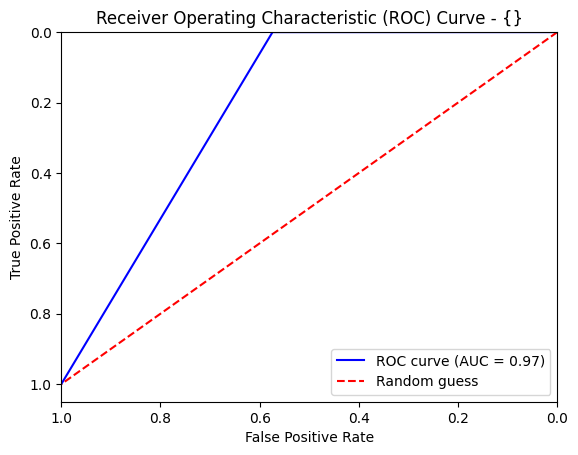

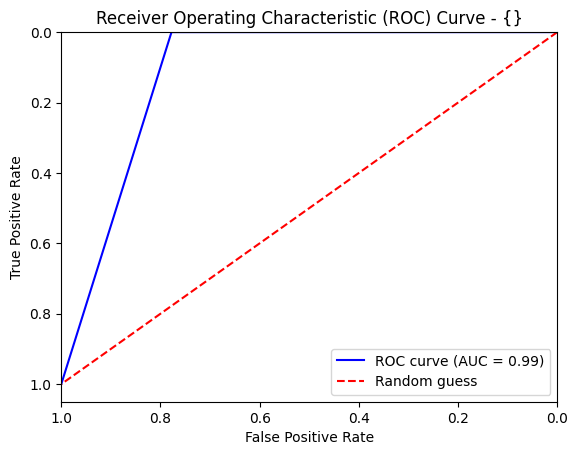

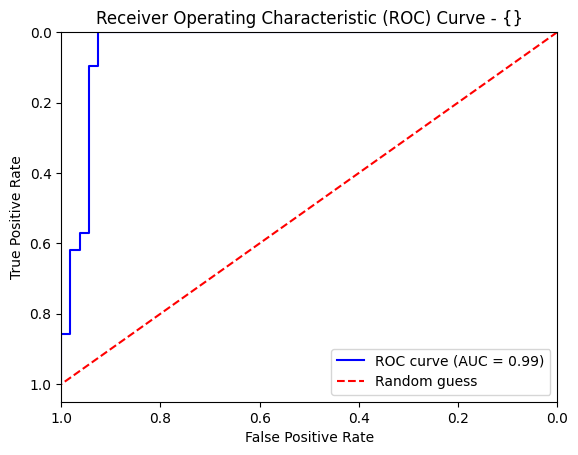

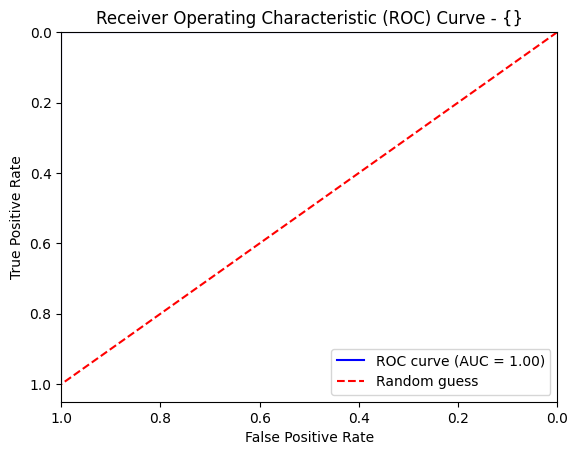

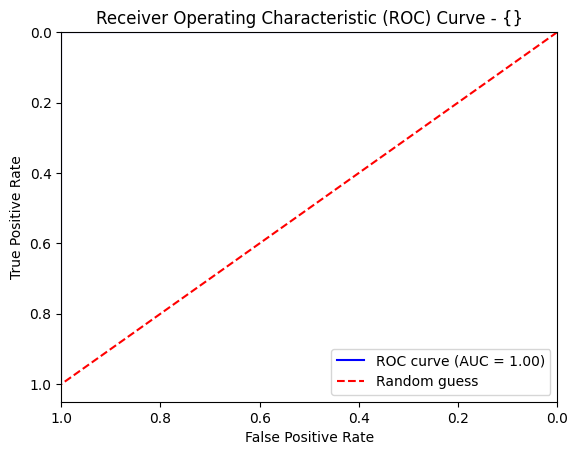

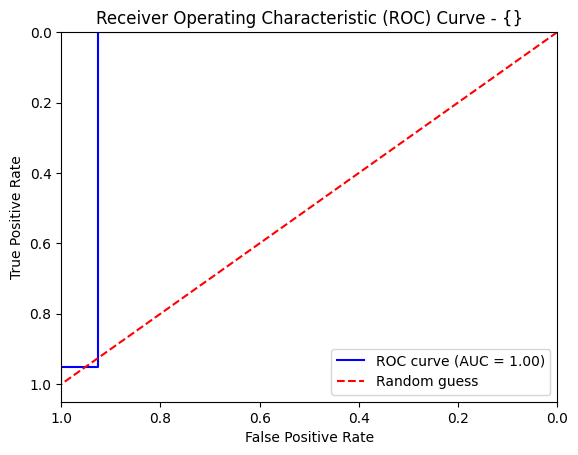

In [37]:

import matplotlib.pyplot as plt
for index in range(len(curves)):
  curve = curves[index]
  auc_score = auc_scores[index]

  fpr = curve[0]
  tpr = curve[1]
  thresholds = curve[2]

  plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.gca().invert_xaxis()
  plt.gca().invert_yaxis()
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve - {}')
  plt.legend(loc="lower right")
  plt.show()

In [38]:
# Out of all classifiers used in this assignment, which would you choose as a final
# model for the iris data?